# Spark SQL
##### Objetivos
1. Ejecutar consultas SQL
1. Crear DataFrames a partir de tablas
3. Escribir queries para ejecutar transformaciones en DataFrames
1. Ejecutar acciones en DataFrames
1. Aprender la conversión entre SQL y Dataframes

##### Métodos
- <a href="https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/spark_session.html" target="_blank">SparkSession</a>: **`sql`**, **`table`**
- <a href="https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/dataframe.html" target="_blank">DataFrame</a>:
  - Transformaciones:  **`select`**, **`where`**, **`orderBy`**
  - Acciones: **`show`**, **`count`**, **`take`**
  - Otros métodos: **`printSchema`**, **`schema`**, **`createOrReplaceTempView`**

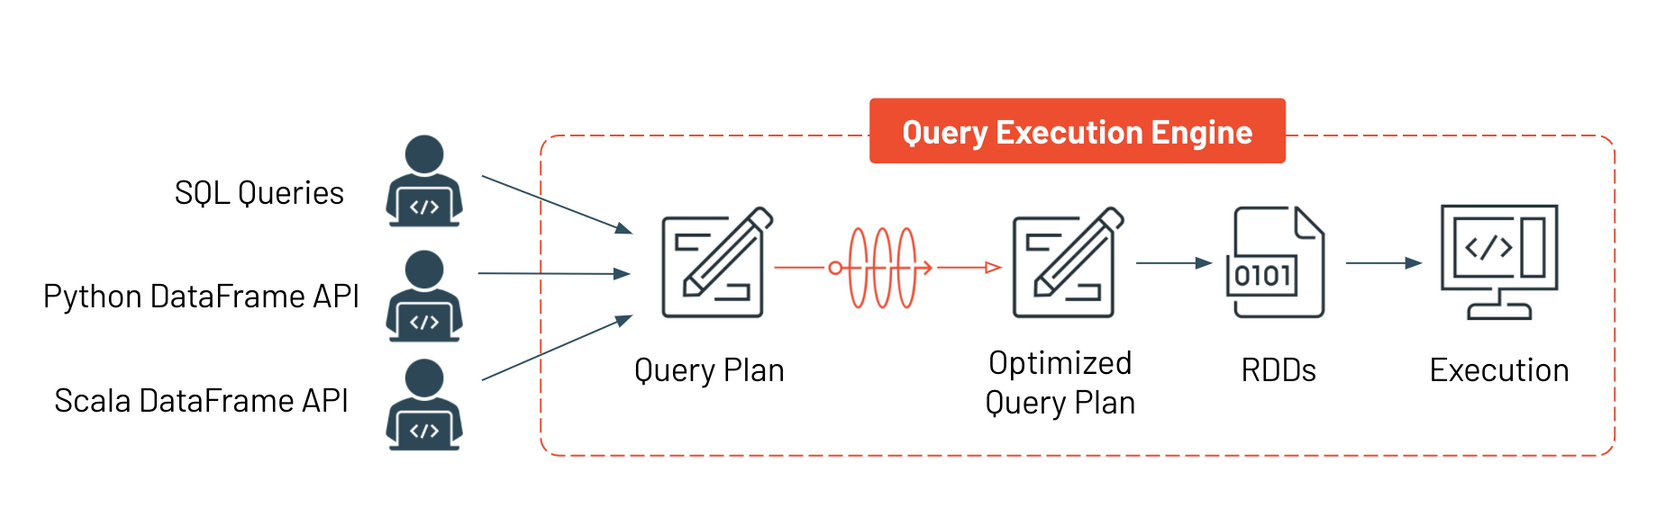

In [ ]:
%pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=3482b474b8db4dfd2408a2f8a2bd1b18fc6e9648923cce2c83691046c9fd4665
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
from pyspark import SparkContext

spark = SparkSession.builder.master('local[*]').appName('spark-sql').getOrCreate()
sc = SparkContext.getOrCreate()

#### **`SparkSession`** Methods
| Method | Description |
| --- | --- |
| sql | Returns a DataFrame representing the result of the given query |
| table | Returns the specified table as a DataFrame |
| read | Returns a DataFrameReader that can be used to read data in as a DataFrame |
| range | Create a DataFrame with a column containing elements in a range from start to end (exclusive) with step value and number of partitions |
| createDataFrame | Creates a DataFrame from a list of tuples, primarily used for testing |

Antes de utilizar Spark SQL debemos obtener datos, en este caso vamos a leer datos a partir de un csv en Google Drive.

In [ ]:
df = spark.read.csv('/content/sample_data/california_housing_test.csv', header=True)
df.createOrReplaceTempView('cht')

In [ ]:
spark.sql('select * from cht').show(10)

+-----------+
|  longitude|
+-----------+
|-122.050000|
|-118.300000|
|-117.810000|
|-118.360000|
|-119.670000|
|-119.560000|
|-121.430000|
|-120.650000|
|-122.840000|
|-118.020000|
+-----------+
only showing top 10 rows



In [ ]:
df.schema

StructType([StructField('longitude', StringType(), True), StructField('latitude', StringType(), True), StructField('housing_median_age', StringType(), True), StructField('total_rooms', StringType(), True), StructField('total_bedrooms', StringType(), True), StructField('population', StringType(), True), StructField('households', StringType(), True), StructField('median_income', StringType(), True), StructField('median_house_value', StringType(), True)])

In [ ]:
df.printSchema()

root
 |-- longitude: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- housing_median_age: string (nullable = true)
 |-- total_rooms: string (nullable = true)
 |-- total_bedrooms: string (nullable = true)
 |-- population: string (nullable = true)
 |-- households: string (nullable = true)
 |-- median_income: string (nullable = true)
 |-- median_house_value: string (nullable = true)



## Transformations
Cuando creamos df, utilizamos una serie de métodos de transformación de DataFrame, como select, where y orderBy.

<strong><code>df  
&nbsp;  .select("total_rooms", "population")  
&nbsp;  .where("total_bedrooms < 200")  
&nbsp;  .orderBy("population")  
</code></strong>
    
Las transformaciones operan en DataFrames y devuelven DataFrames, lo que nos permite encadenar métodos de transformación para construir nuevos DataFrames. Sin embargo, estas operaciones no se ejecutan por sí mismas, ya que los métodos de transformación se evalúan de manera perezosa.

In [ ]:
df.select("total_rooms", "population").where("total_bedrooms < 200").orderBy("population")

DataFrame[total_rooms: string, population: string]

## Actions
Por otro lado, las acciones de DataFrame son métodos que inician la computación. Las acciones son necesarias para desencadenar la ejecución de cualquier transformación en el DataFrame.

La acción show provoca que la celda siguiente ejecute transformaciones.

In [ ]:
df.select("total_rooms", "population").where("total_bedrooms < 200").orderBy("population").show()

+-----------+-----------+
|total_rooms| population|
+-----------+-----------+
| 407.000000| 100.000000|
| 923.000000|1014.000000|
| 639.000000|1062.000000|
| 107.000000| 107.000000|
| 880.000000|1148.000000|
| 718.000000| 119.000000|
| 105.000000| 125.000000|
| 204.000000| 133.000000|
| 142.000000| 137.000000|
| 255.000000| 138.000000|
| 531.000000| 139.000000|
|  25.000000|  14.000000|
|  32.000000|  14.000000|
| 365.000000| 140.000000|
| 369.000000| 145.000000|
| 202.000000| 145.000000|
| 906.000000|1453.000000|
| 172.000000| 149.000000|
| 349.000000| 149.000000|
| 314.000000| 152.000000|
+-----------+-----------+
only showing top 20 rows



A continuación se presentan varios ejemplos de acciones de <a href="https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql.html#dataframe-apis" target="_blank">DataFrame</a>.

### DataFrame Action Methods
| Method | Description |
| --- | --- |
| show | Displays the top n rows of DataFrame in a tabular form |
| count | Returns the number of rows in the DataFrame |
| describe,  summary | Computes basic statistics for numeric and string columns |
| first, head | Returns the the first row |
| collect | Returns an array that contains all rows in this DataFrame |
| take | Returns an array of the first n rows in the DataFrame |


# De DataFrames a SQL




**`createOrReplaceTempView`** crea una vista temporal basada en el DataFrame. La vida útil de la vista temporal está vinculada a la SparkSession que se utilizó para crear el DataFrame.

In [ ]:
df.createOrReplaceTempView('houses')
spark.sql('select * from houses').show()

+-----------+---------+------------------+-----------+--------------+-----------+-----------+-------------+------------------+
|  longitude| latitude|housing_median_age|total_rooms|total_bedrooms| population| households|median_income|median_house_value|
+-----------+---------+------------------+-----------+--------------+-----------+-----------+-------------+------------------+
|-122.050000|37.370000|         27.000000|3885.000000|    661.000000|1537.000000| 606.000000|     6.608500|     344700.000000|
|-118.300000|34.260000|         43.000000|1510.000000|    310.000000| 809.000000| 277.000000|     3.599000|     176500.000000|
|-117.810000|33.780000|         27.000000|3589.000000|    507.000000|1484.000000| 495.000000|     5.793400|     270500.000000|
|-118.360000|33.820000|         28.000000|  67.000000|     15.000000|  49.000000|  11.000000|     6.135900|     330000.000000|
|-119.670000|36.330000|         19.000000|1241.000000|    244.000000| 850.000000| 237.000000|     2.937500|    